In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.shape

(319795, 18)

In [5]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [6]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [7]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
# Transforming
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Label encoding for ordinal, one hot encoding for nominal
df['AgeCategory'] = label_encoder.fit_transform(df['AgeCategory'])
df['GenHealth'] = label_encoder.fit_transform(df['GenHealth'])
df = pd.get_dummies(df, columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 
                                  'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 
                                  'Asthma', 'KidneyDisease', 'SkinCancer'], drop_first = True)

# Standard normalization for quantitative variables
df['BMI'] = scaler.fit_transform(df[['BMI']])
df['PhysicalHealth'] = scaler.fit_transform(df[['PhysicalHealth']])
df['MentalHealth'] = scaler.fit_transform(df[['MentalHealth']])
df['SleepTime'] = scaler.fit_transform(df[['SleepTime']])

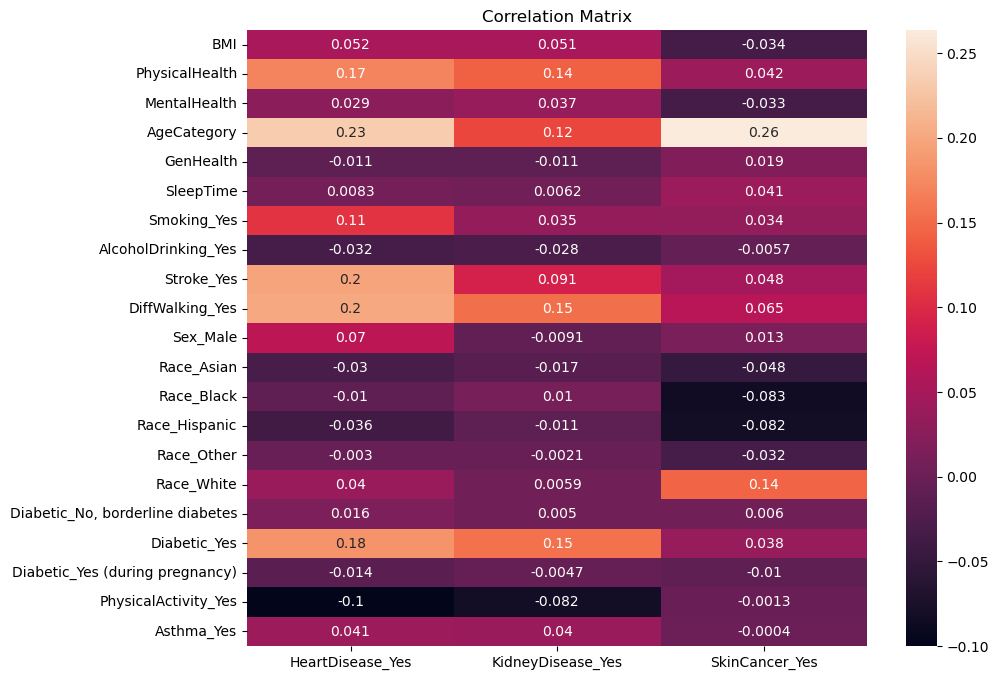

Top 10 factors with strongest correlation to heart disease:
AgeCategory        0.233432
DiffWalking_Yes    0.201258
Stroke_Yes         0.196835
Diabetic_Yes       0.183072
PhysicalHealth     0.170721
Smoking_Yes        0.107764
Sex_Male           0.070040
BMI                0.051803
Asthma_Yes         0.041444
Race_White         0.040121
Name: HeartDisease_Yes, dtype: float64 

Top 10 factors with strongest correlation to kidney disease:
Diabetic_Yes       0.154268
DiffWalking_Yes    0.153064
PhysicalHealth     0.142197
AgeCategory        0.123190
Stroke_Yes         0.091167
BMI                0.050768
Asthma_Yes         0.039707
MentalHealth       0.037281
Smoking_Yes        0.034920
Race_Black         0.010300
Name: KidneyDisease_Yes, dtype: float64 

Top 10 factors with strongest correlation to skin cancer:
AgeCategory        0.263537
Race_White         0.144862
DiffWalking_Yes    0.064840
Stroke_Yes         0.048116
PhysicalHealth     0.041700
SleepTime          0.041266
Diabetic_Y

In [9]:
# 1. Which factors have the strongest correlation with Heart Disease, Kidney Disease, and Skin Cancer?
correlation_matrix = df.corr()
diseases = ['HeartDisease_Yes', 'KidneyDisease_Yes', 'SkinCancer_Yes']
correlation_matrix = correlation_matrix[diseases]
correlation_matrix = correlation_matrix.drop(['HeartDisease_Yes', 'KidneyDisease_Yes', 'SkinCancer_Yes'], axis = 0)

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix')
plt.show()

# Get the correlation
strongest_heart = correlation_matrix['HeartDisease_Yes'].sort_values(ascending = False)[0:10]
strongest_kidney = correlation_matrix['KidneyDisease_Yes'].sort_values(ascending = False)[0:10]
strongest_skin = correlation_matrix['SkinCancer_Yes'].sort_values(ascending = False)[0:10]

print('Top 10 factors with strongest correlation to heart disease:')
print(strongest_heart, '\n')
print('Top 10 factors with strongest correlation to kidney disease:')
print(strongest_kidney, '\n')
print('Top 10 factors with strongest correlation to skin cancer:')
print(strongest_skin, '\n')

In [10]:
df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,...,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-1.844750,-0.046751,3.281069,7,4,-1.460354,False,True,False,False,...,False,False,True,False,True,False,True,True,False,True
1,-1.256338,-0.424070,-0.490039,12,4,-0.067601,False,False,False,True,...,False,False,True,False,False,False,True,False,False,False
2,-0.274603,2.091388,3.281069,9,1,0.628776,False,True,False,False,...,False,False,True,False,True,False,True,True,False,False
3,-0.647473,-0.424070,-0.490039,11,2,-0.763977,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,-0.726138,3.097572,-0.490039,4,4,0.628776,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


In [11]:
# 2. Predict diseases based on features
Y = df[['HeartDisease_Yes', 'KidneyDisease_Yes', 'SkinCancer_Yes']]
Y_heart = df[['HeartDisease_Yes']]
Y_kidney = df[['KidneyDisease_Yes']]
Y_skin = df[['SkinCancer_Yes']]
X = df.drop(Y.columns, axis = 1)

# Heart disease
print('Heart Disease Modeling')
X_heart_train, X_heart_test, Y_heart_train, Y_heart_test = train_test_split(
    X, Y_heart.values.ravel(), test_size = 0.3, stratify = Y_heart)

log_reg = LogisticRegression(max_iter = 10000)
log_reg.fit(X_heart_train, Y_heart_train)
Y_heart_pred = log_reg.predict(X_heart_test)
print('Accuracy:', accuracy_score(Y_heart_test, Y_heart_pred))
print('Precision:', precision_score(Y_heart_test, Y_heart_pred))
print('Recall:', recall_score(Y_heart_test, Y_heart_pred))
print('F1 Score:', f1_score(Y_heart_test, Y_heart_pred))
print('Classification Report: \n', classification_report(Y_heart_test, Y_heart_pred))

# Kidney disease
print('Kidney Disease Modeling')
X_kidney_train, X_kidney_test, Y_kidney_train, Y_kidney_test = train_test_split(
    X, Y_kidney.values.ravel(), test_size = 0.3, stratify = Y_kidney)

log_reg = LogisticRegression(max_iter = 10000)
log_reg.fit(X_kidney_train, Y_kidney_train)
Y_kidney_pred = log_reg.predict(X_kidney_test)
print('Accuracy:', accuracy_score(Y_kidney_test, Y_kidney_pred))
print('Precision:', precision_score(Y_kidney_test, Y_kidney_pred))
print('Recall:', recall_score(Y_kidney_test, Y_kidney_pred))
print('F1 Score:', f1_score(Y_kidney_test, Y_kidney_pred))
print('Classification Report: \n', classification_report(Y_kidney_test, Y_kidney_pred))

# Skin cancer
print('Skin Cancer Modeling')
X_skin_train, X_skin_test, Y_skin_train, Y_skin_test = train_test_split(
    X, Y_skin.values.ravel(), test_size = 0.3, stratify = Y_skin)

log_reg = LogisticRegression(max_iter = 10000)
log_reg.fit(X_skin_train, Y_skin_train)
Y_skin_pred = log_reg.predict(X_skin_test)
print('Accuracy:', accuracy_score(Y_skin_test, Y_skin_pred))
print('Precision:', precision_score(Y_skin_test, Y_skin_pred))
print('Recall:', recall_score(Y_skin_test, Y_skin_pred))
print('F1 Score:', f1_score(Y_skin_test, Y_skin_pred))
print('Classification Report: \n', classification_report(Y_skin_test, Y_skin_pred))

Heart Disease Modeling
Accuracy: 0.9142475948258789
Precision: 0.4945054945054945
Recall: 0.08219678519240137
F1 Score: 0.14096272319097838
Classification Report: 
               precision    recall  f1-score   support

       False       0.92      0.99      0.95     87727
        True       0.49      0.08      0.14      8212

    accuracy                           0.91     95939
   macro avg       0.71      0.54      0.55     95939
weighted avg       0.88      0.91      0.89     95939

Kidney Disease Modeling
Accuracy: 0.9631119774023077
Precision: 0.2727272727272727
Recall: 0.0008488964346349745
F1 Score: 0.001692524682651622
Classification Report: 
               precision    recall  f1-score   support

       False       0.96      1.00      0.98     92405
        True       0.27      0.00      0.00      3534

    accuracy                           0.96     95939
   macro avg       0.62      0.50      0.49     95939
weighted avg       0.94      0.96      0.95     95939

Skin Cancer 